In this notebook I would like to investigate what gives a student the best chances to be successful in their studies.
It's common knowledge that a student is going to thrive if being in the right supportive environment but are there other factors which might impact the success of the student, e.g. physical activity, spending more free time outside, etc.?

With this notebook I'm going to touch on these topics and will make a clear picture to showcase in which environment and what factors a student can be more successful.

In [1]:
#importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import chi2_contingency #scipy to evaluate dependecies of categories
from scipy.stats.contingency import association

In [2]:
#pulling the data from the csv file
data = pd.read_csv('/Users/Mirko/Desktop/Data_Science/IH_Notebooks/E2E_DataProject/StudentPerformanceFactors.csv')
df = data.copy()

In [3]:
df.sample(7)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
860,21,62,Medium,Low,No,6,74,High,Yes,0,Low,High,Private,Positive,3,Yes,Postgraduate,Far,Male,62
5671,20,99,Medium,Low,Yes,5,97,Low,Yes,4,High,Medium,Public,Neutral,3,No,College,Near,Female,73
64,25,98,Low,High,Yes,8,56,Medium,No,0,Medium,High,Private,Neutral,3,No,Postgraduate,Near,Male,71
2964,27,92,Low,Medium,Yes,9,53,Low,Yes,2,Low,Medium,Public,Negative,2,No,College,Far,Male,68
3153,18,79,Medium,Medium,No,8,70,High,Yes,3,Medium,Medium,Public,Positive,3,No,College,Near,Female,68
1411,23,68,Low,Low,Yes,7,92,Medium,No,3,Low,High,Private,Neutral,4,No,High School,Near,Male,65
290,19,60,Medium,High,Yes,7,72,High,Yes,3,Low,High,Public,Positive,3,No,High School,Moderate,Female,65


First thing I'm going to do is **Data Cleaning**.

In [4]:
df.isnull().sum()


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [5]:
#assigning lower case to column names
df.columns = [col.lower()for col in df.columns] # snake_case

We see that some values are missing for the teacher quality, parental education level and distance from home.
I'm going to fill the NaN values with the mode of these columns so that I'm not going to remove valuable data from the dataframe.
**Mode** is used in this case as these are categorical values and it would be impossible to calculate an average.

In [6]:
df['teacher_quality'].mode()

0    Medium
Name: teacher_quality, dtype: object

In [7]:
df['parental_education_level'].mode()

0    High School
Name: parental_education_level, dtype: object

In [8]:
df['distance_from_home'].mode()

0    Near
Name: distance_from_home, dtype: object

In [9]:
import warnings
warnings.filterwarnings("ignore")

df['teacher_quality'].fillna('Medium', inplace= True)
df['parental_education_level'].fillna('High School', inplace= True)
df['distance_from_home'].fillna('Near', inplace= True)

In [10]:
#checking result
df.isnull().sum()

hours_studied                 0
attendance                    0
parental_involvement          0
access_to_resources           0
extracurricular_activities    0
sleep_hours                   0
previous_scores               0
motivation_level              0
internet_access               0
tutoring_sessions             0
family_income                 0
teacher_quality               0
school_type                   0
peer_influence                0
physical_activity             0
learning_disabilities         0
parental_education_level      0
distance_from_home            0
gender                        0
exam_score                    0
dtype: int64

Now we have no missing values. We can therefore proceed to the next tasks.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hours_studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
sleep_hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
previous_scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
tutoring_sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
physical_activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
exam_score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


In [12]:
cat = df.select_dtypes(exclude='number')
num = df.select_dtypes(include='number')

In [13]:
frequency_table_parent = cat['parental_involvement'].value_counts()
proportion_table = cat['parental_involvement'].value_counts(normalize= True).round(2)

df2 = pd.concat([frequency_table_parent, proportion_table], axis=1)
df2.columns = ['absolute_frequency', 'relative_frequency']
df2

,absolute_frequency,relative_frequency
parental_involvement,,
Medium,3362,0.51
High,1908,0.29
Low,1337,0.20


In [14]:
frequency_table_teacher = cat['teacher_quality'].value_counts()
proportion_table_teacher = cat['teacher_quality'].value_counts(normalize= True).round(2)

df3 = pd.concat([frequency_table_teacher, proportion_table_teacher], axis=1)
df3.columns = ['absolute_frequency', 'relative_frequency']
df3

,absolute_frequency,relative_frequency
teacher_quality,,
Medium,4003,0.61
High,1947,0.29
Low,657,0.10


In [15]:
# creating a Xtab between parental involvement and student motivation level
crosstab_result = pd.crosstab(index=df.parental_involvement, columns=df.motivation_level)
crosstab_result

motivation_level,High,Low,Medium
parental_involvement,,,
High,359,574,975
Low,278,368,691
Medium,682,995,1685


Looking at the cross tab we could say that parental involvement doesn't seem to be a valuable factor which would lead to high motivation as no matter the parental involvement level the most common motivation level is **Medium**.

I will extend this onto the teacher quality.

In [16]:
crosstab_result2 = pd.crosstab(index=df.teacher_quality, columns=df.motivation_level)
crosstab_result2

motivation_level,High,Low,Medium
teacher_quality,,,
High,405,582,960
Low,134,156,367
Medium,780,1199,2024


Also teacher quality doesn't seem to play an important role on the student motivation.

In [17]:
crosstab_result3 = pd.crosstab(index=df.parental_education_level, columns=df.motivation_level)
crosstab_result3

motivation_level,High,Low,Medium
parental_education_level,,,
College,419,581,989
High School,657,970,1686
Postgraduate,243,386,676


In [18]:
crosstab_result4 = pd.crosstab(index=df.gender, columns=df.motivation_level)
crosstab_result4

motivation_level,High,Low,Medium
gender,,,
Female,548,841,1404
Male,771,1096,1947


The cross tab analysis didn't provide any valuable feedback but confirmed that motivation level is more of a subjective factor rather than being environmentally influenced.

This makes sense if you think that each student might have very different lives and interests than the rest of their peers.

We can now proceed and evaluate if any categorical variable is influencing numerical variables.

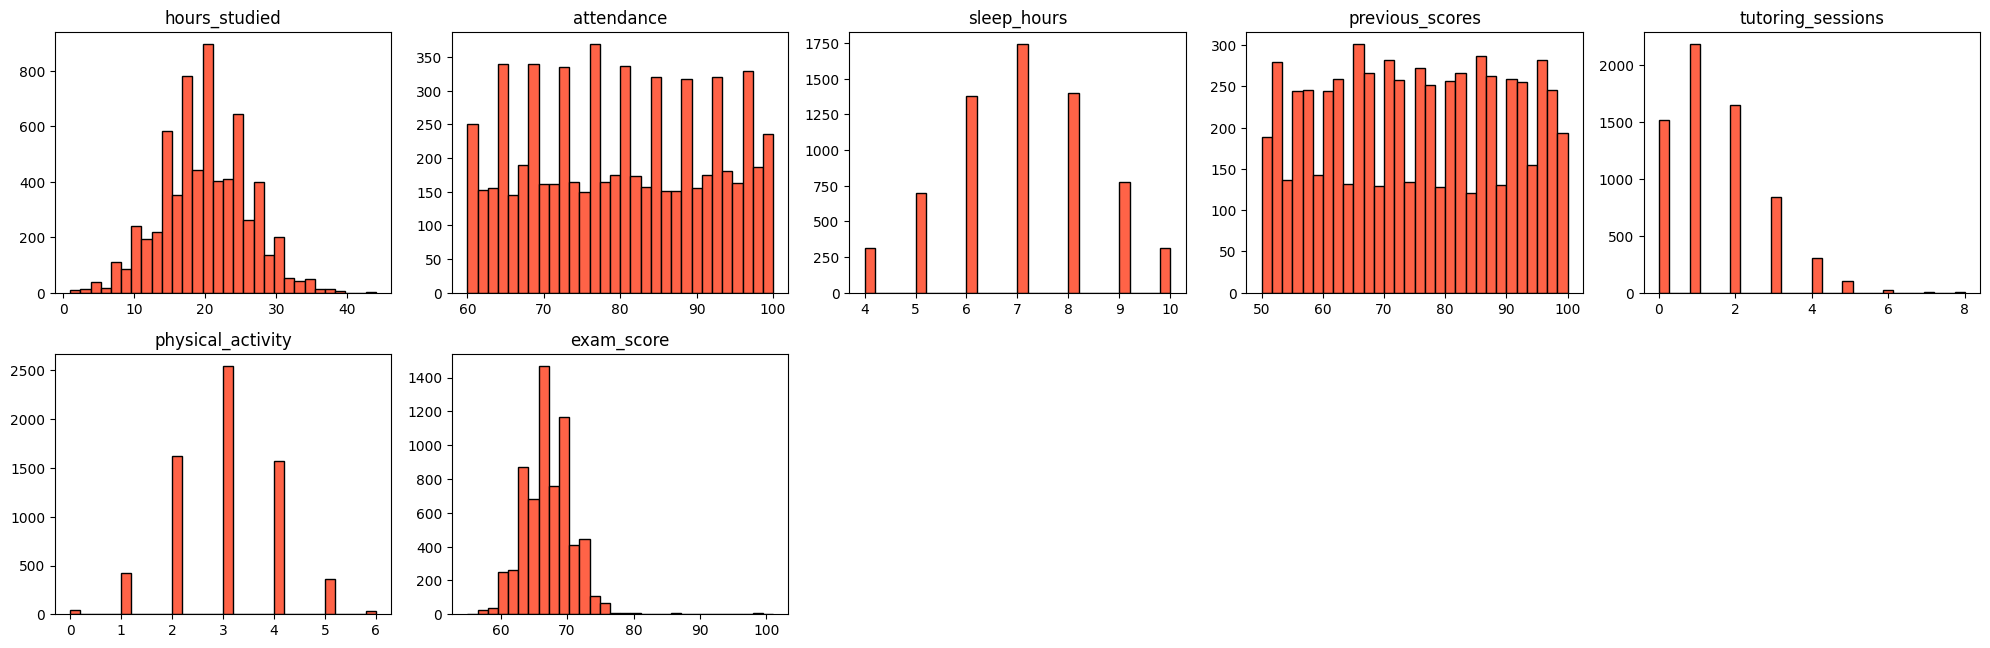

In [19]:
color = '#FF6347'

# grid size
nrows, ncols = 5, 5  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

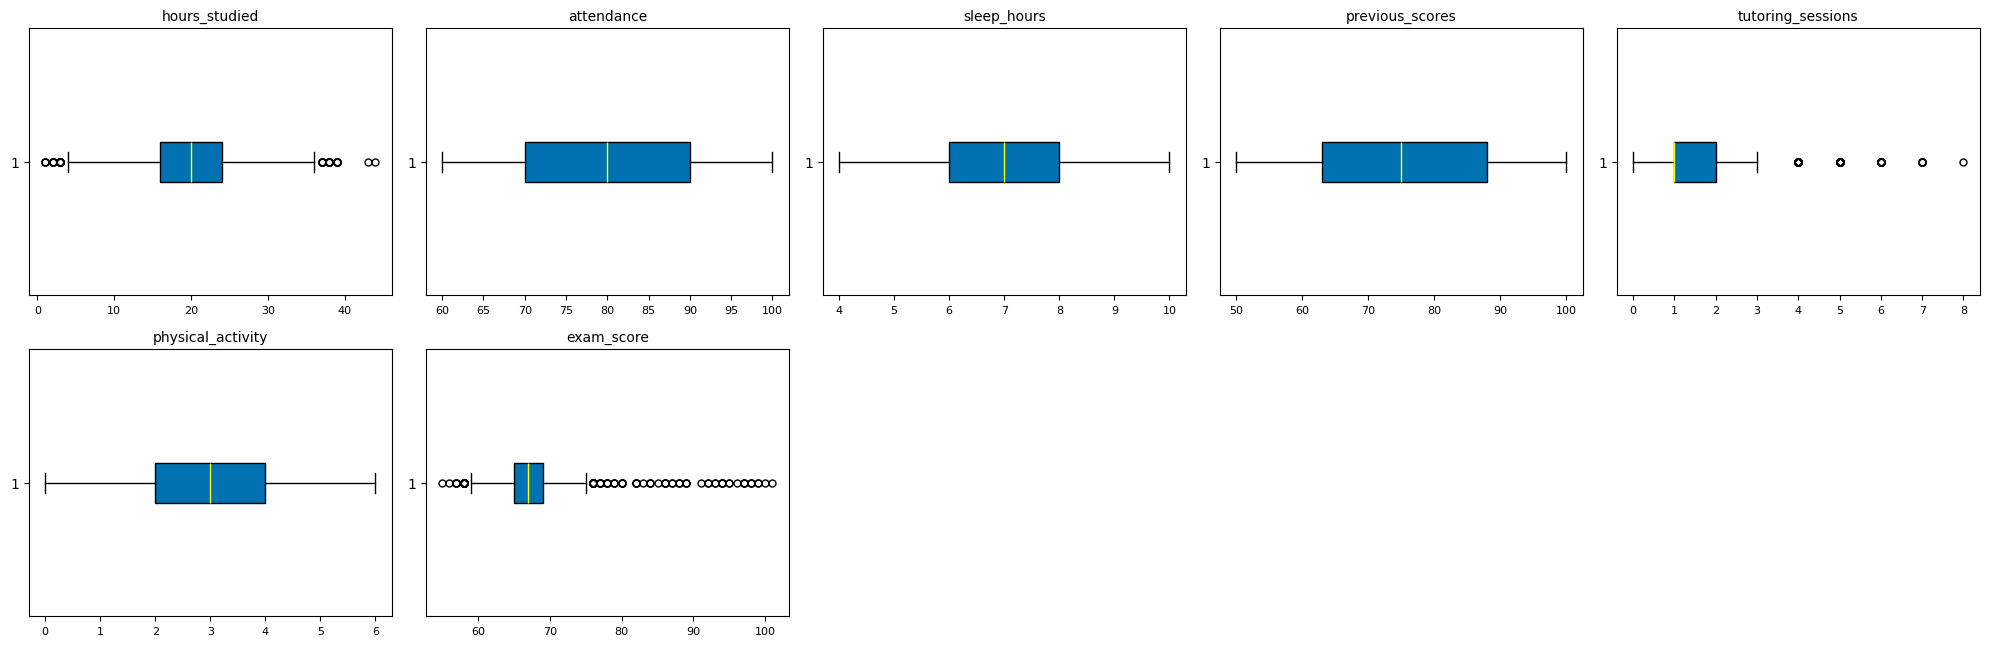

In [20]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='black'),
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

Looking into the numerical data we also cannot see right away a variable with many outliers. The data seems to be evenly distributed for all of the variables, which means that I'm going to deep dive into detail for Low Performers and High Performers.

Once the dataset is divided into these 2 groups I can then investigate furtherwhat factors are common in one group and the other.

In [21]:
#creating 2 dfs to divide high and low performers
low_df = df.copy()
high_df = df.copy()

In [22]:
#filtering out high performers
low_df = low_df.loc[(low_df['exam_score'] < 70.0)]

In [23]:
#filtering out low performers
high_df = high_df.loc[(high_df['exam_score'] >= 70.0)]

In [24]:
low_df.describe().T

,count,mean,std,min,25%,50%,75%,max
hours_studied,4982.0,18.703733,5.603773,1.0,15.0,19.0,23.0,38.0
attendance,4982.0,76.714171,10.607723,60.0,68.0,76.0,84.0,100.0
sleep_hours,4982.0,7.029305,1.463586,4.0,6.0,7.0,8.0,10.0
previous_scores,4982.0,73.862706,14.318460,50.0,62.0,73.0,86.0,100.0
tutoring_sessions,4982.0,1.407266,1.181795,0.0,1.0,1.0,2.0,8.0
physical_activity,4982.0,2.952830,1.017012,0.0,2.0,3.0,4.0,6.0
exam_score,4982.0,65.684263,2.457360,55.0,64.0,66.0,68.0,69.0


In [25]:
high_df.describe().T

,count,mean,std,min,25%,50%,75%,max
hours_studied,1625.0,23.873846,5.431115,1.0,20.0,24.0,28.0,44.0
attendance,1625.0,89.982154,8.028754,61.0,86.0,92.0,96.0,100.0
sleep_hours,1625.0,7.028308,1.482388,4.0,6.0,7.0,8.0,10.0
previous_scores,1625.0,78.773538,14.016015,50.0,68.0,80.0,91.0,100.0
tutoring_sessions,1625.0,1.758769,1.335255,0.0,1.0,2.0,3.0,7.0
physical_activity,1625.0,3.012923,1.072705,0.0,2.0,3.0,4.0,6.0
exam_score,1625.0,71.992000,3.609212,70.0,70.0,71.0,72.0,101.0


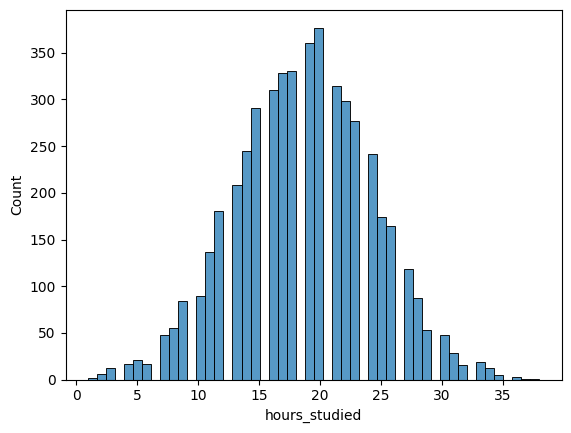

In [26]:
import seaborn as sns

sns.histplot(low_df.hours_studied, bins=50)
plt.show()

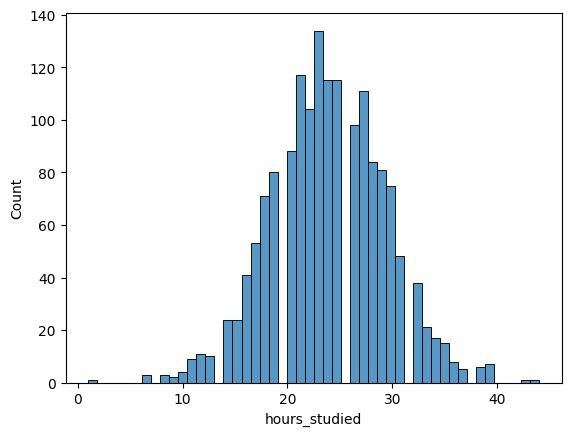

In [27]:
sns.histplot(high_df.hours_studied, bins=50)
plt.show()

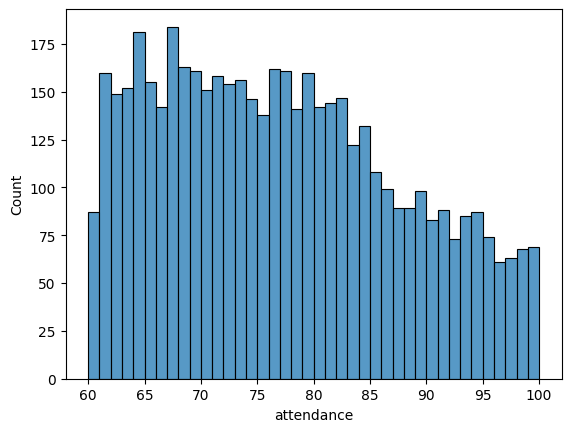

In [28]:
sns.histplot(low_df.attendance, bins=40)
plt.show()

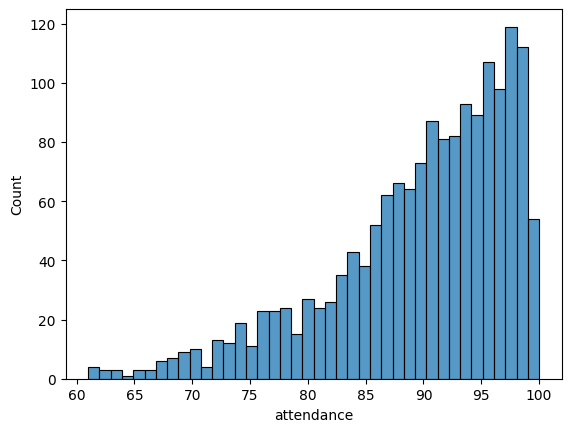

In [29]:
sns.histplot(high_df.attendance, bins=40)
plt.show()

In [30]:
mean_study_low = low_df['hours_studied'].mean()

In [31]:
mean_study_high = high_df['hours_studied'].mean()

In [32]:
mean_attendance_low = low_df['attendance'].mean()

In [33]:
mean_attendance_high = high_df['attendance'].mean()

In [34]:
print(f"""
With the above boxplots, we can already determine one key factor:

Higher performers spend, on average, 5 hours more studying than their low-performing peers and have a 13% higher attendance rate.

- Avg time spent by low performers: {mean_study_low}
- Avg time spent by high performers: {mean_study_high}
- Avg attendance rate for low performers: {mean_attendance_low}
- Avg attendance rate for high performers: {mean_attendance_high}
""")


With the above boxplots, we can already determine one key factor:

Higher performers spend, on average, 5 hours more studying than their low-performing peers and have a 13% higher attendance rate.

- Avg time spent by low performers: 18.70373344038539
- Avg time spent by high performers: 23.873846153846152
- Avg attendance rate for low performers: 76.71417101565636
- Avg attendance rate for high performers: 89.98215384615385



I'm going to divide once again categorical and numerical data this time for low and high performers and try and see what variables might be different depending on the performance group.

In [35]:
num_low = low_df.select_dtypes(include='number')
cat_low = low_df.select_dtypes(exclude='number')
num_high = high_df.select_dtypes(include='number')
cat_high = high_df.select_dtypes(exclude='number')

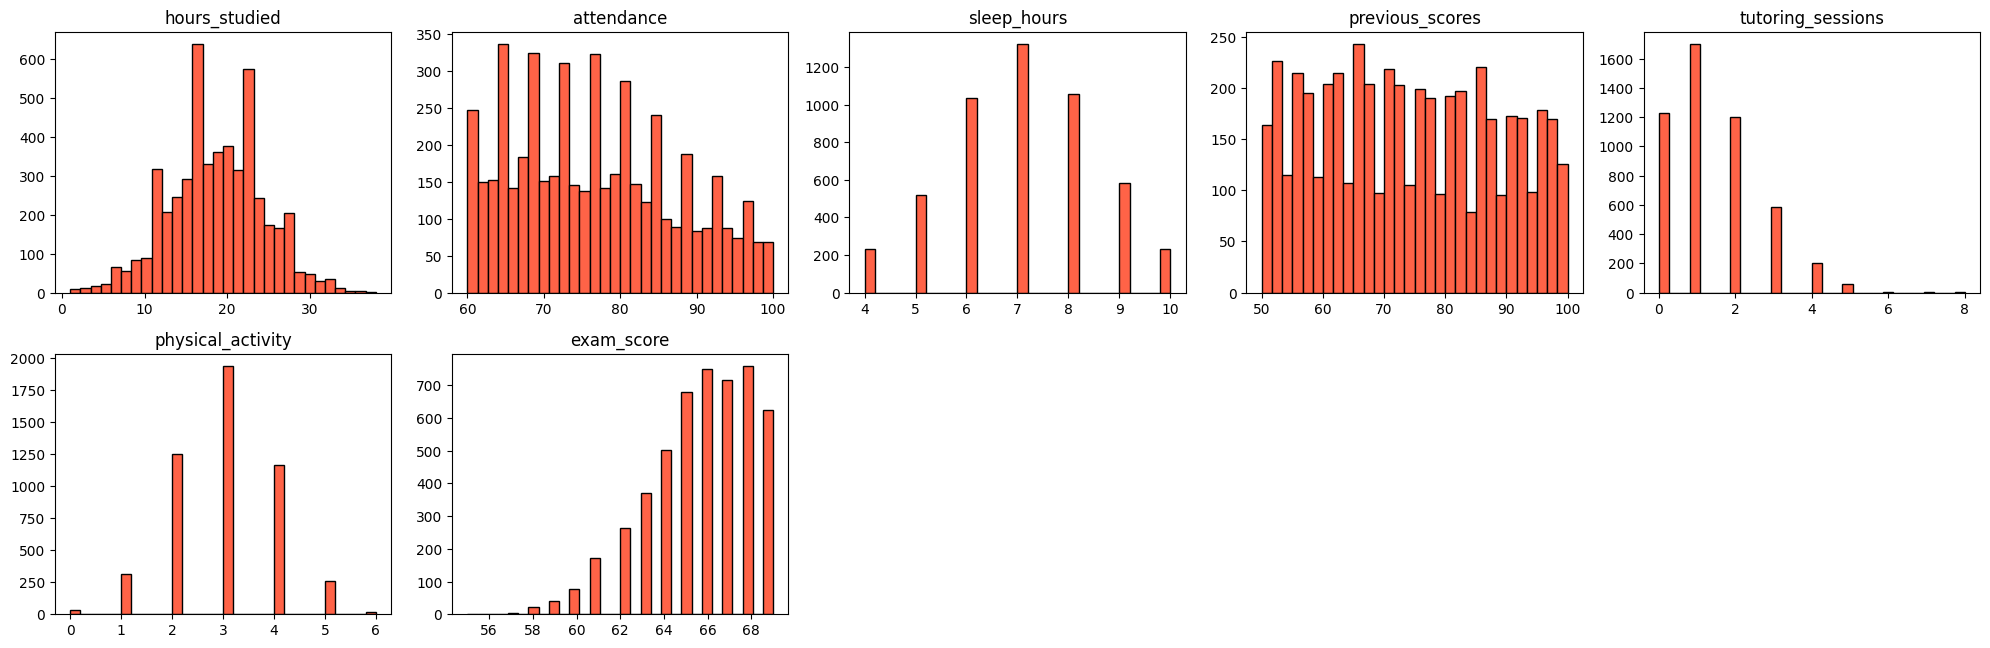

In [36]:
color = '#FF6347'

# grid size
nrows, ncols = 5, 5  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num_low.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num_low.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num_low.columns[i])

plt.tight_layout()
plt.show()

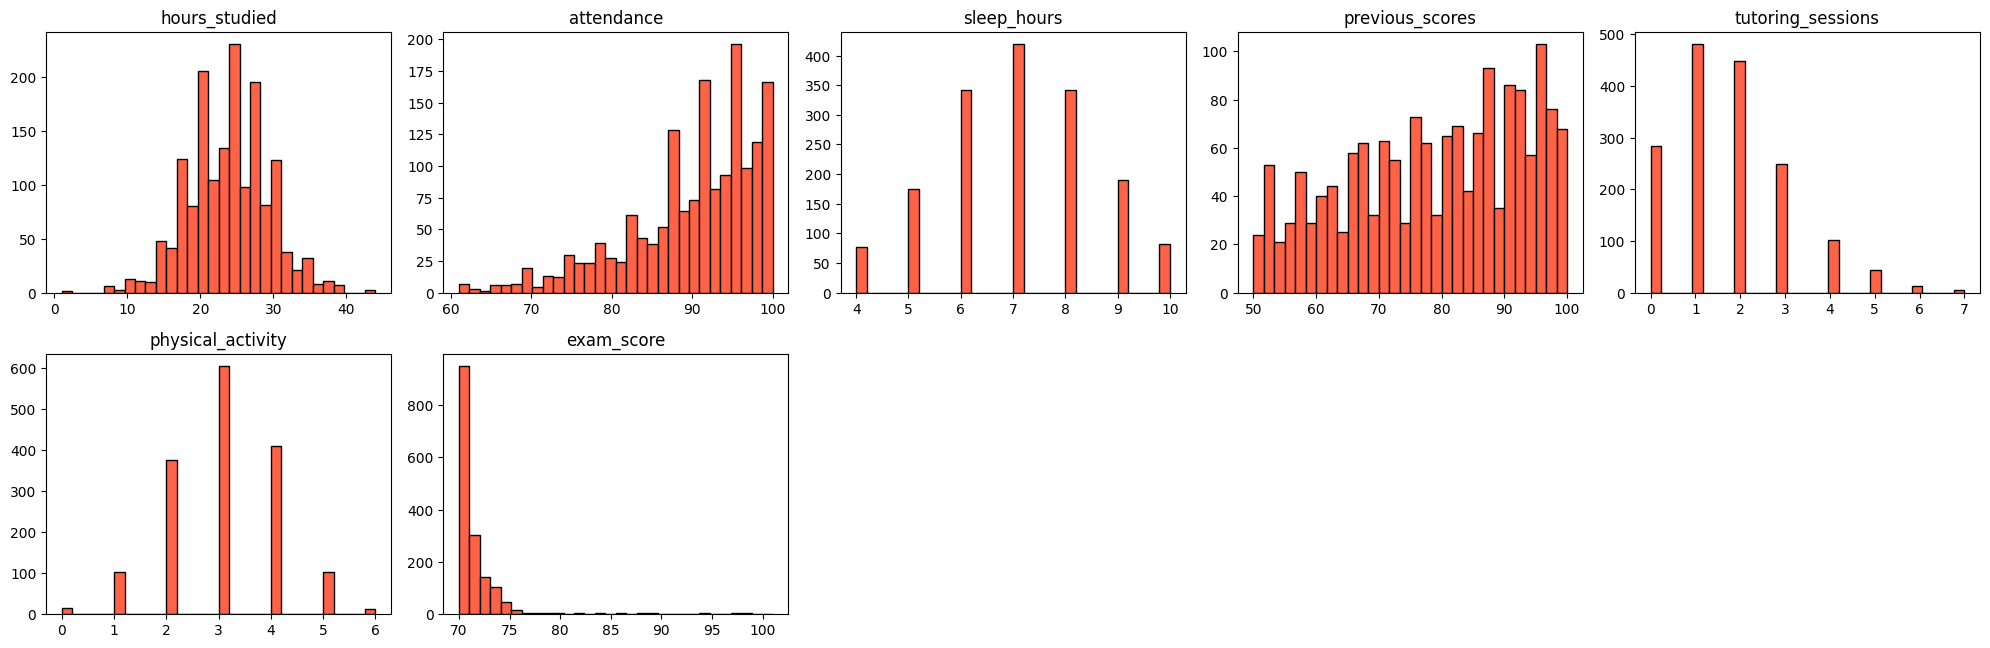

In [37]:
color = '#FF6347'

# grid size
nrows, ncols = 5, 5  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num_high.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num_high.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num_high.columns[i])

plt.tight_layout()
plt.show()

In [38]:
high_previous = high_df['previous_scores'].mean().round(1)

In [39]:
high_exam_result = high_df['exam_score'].mean().round(1)

In [40]:
low_previous = low_df['previous_scores'].mean().round(1)

In [41]:
low_exam_result = low_df['exam_score'].mean().round(1)

In [42]:
high_df['attendance'].mean()

np.float64(89.98215384615385)

In [43]:
low_df['attendance'].mean()

np.float64(76.71417101565636)

In [44]:
high_df['tutoring_sessions'].mean()

np.float64(1.7587692307692309)

In [45]:
low_df['tutoring_sessions'].mean()

np.float64(1.40726615816941)

In [46]:
print(f"""

Looking into this data we can confirm the following differences between the 2 groups:

- hours studied are 5 hours in average more for the high performers
- higher performers have 12% higher attendancy rates
- no other variables seem to have a strong difference between the 2 groups.

It's important to notice however that both groups have experience a drop in average performance between the previous scores and the exam score with a drop of 7 points in percentage:
high performers previous and final exam scores: {high_previous}, {high_exam_result}
low performers previous and final exam scores: {low_previous}, {low_exam_result}

This might be a sympton of tiredness which is usual in students toward the end of the school year.
""")



Looking into this data we can confirm the following differences between the 2 groups:

- hours studied are 5 hours in average more for the high performers
- higher performers have 12% higher attendancy rates
- no other variables seem to have a strong difference between the 2 groups.

It's important to notice however that both groups have experience a drop in average performance between the previous scores and the exam score with a drop of 7 points in percentage:
high performers previous and final exam scores: 78.8, 72.0
low performers previous and final exam scores: 73.9, 65.7

This might be a sympton of tiredness which is usual in students toward the end of the school year.



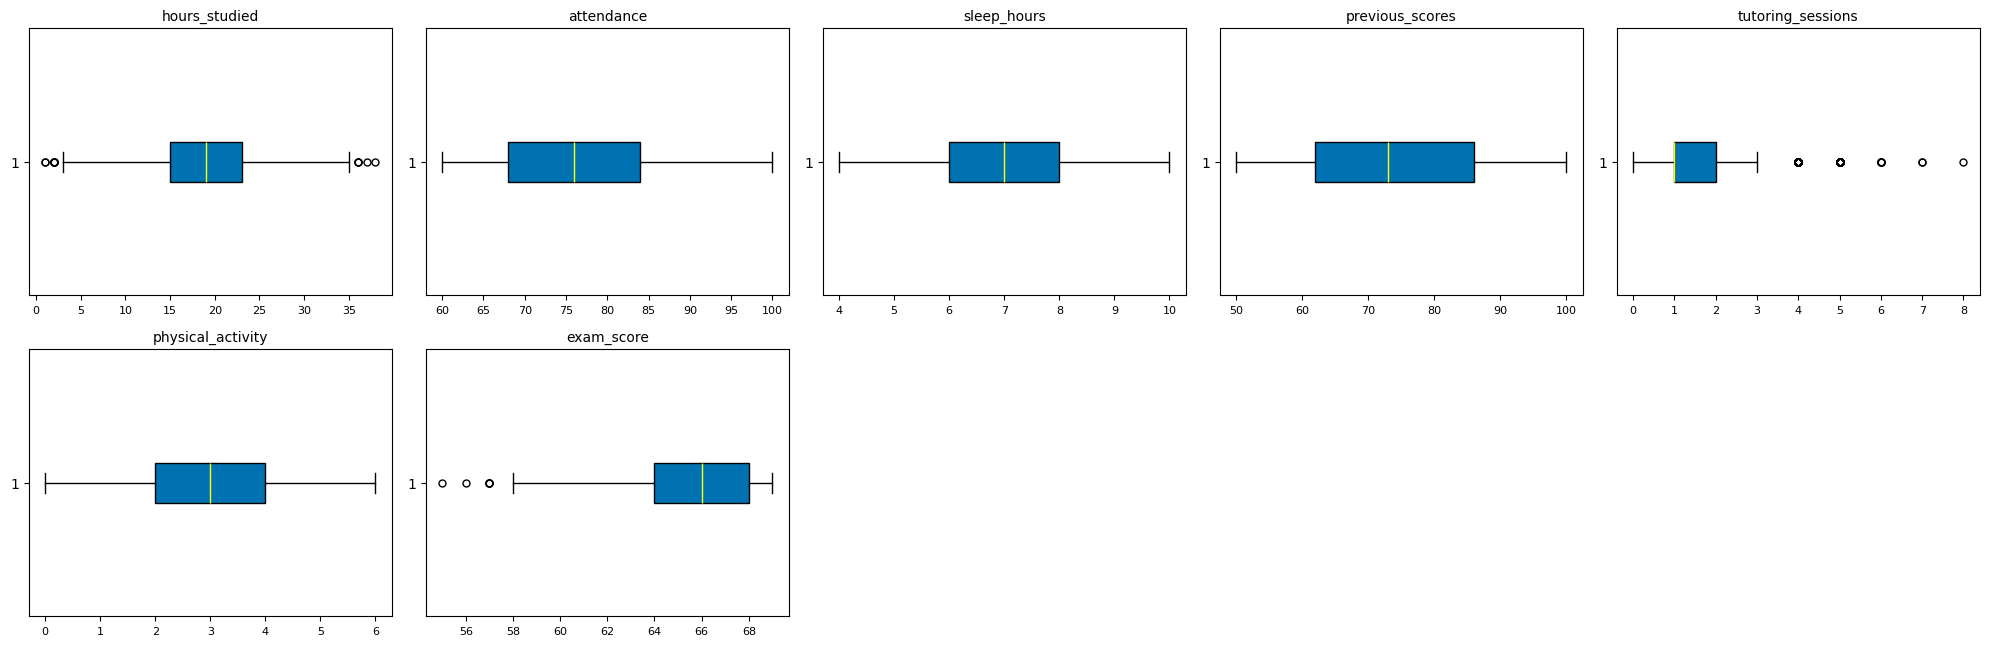

In [47]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num_low.iloc[:, i].dropna(), vert=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='black'),
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num_low.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

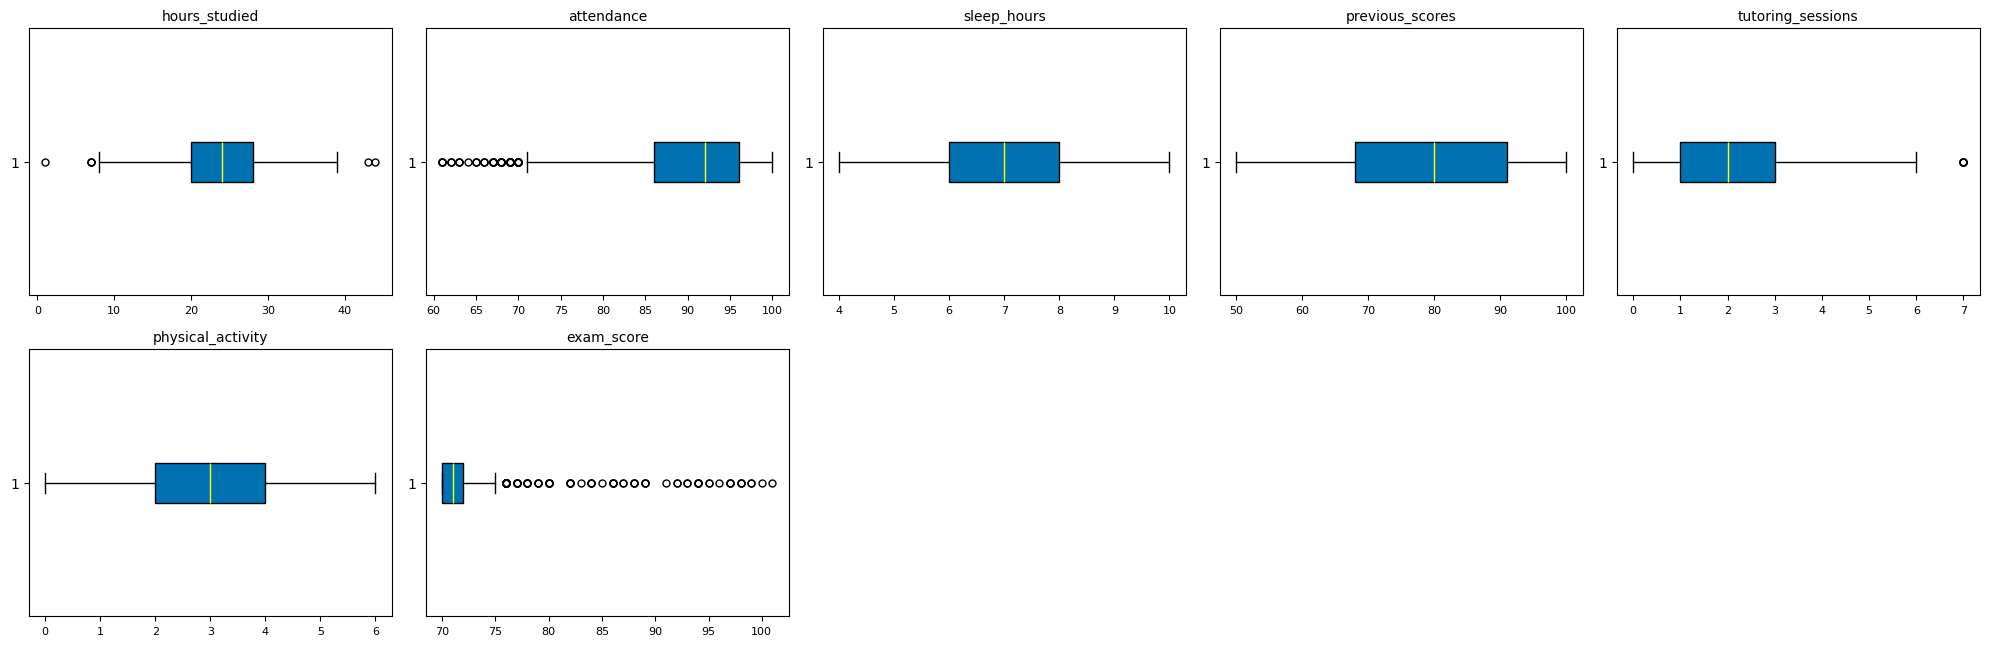

In [48]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num_high.iloc[:, i].dropna(), vert=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='black'),
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num_high.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

I will now try and compare multiple categorical values to find potential factors influencing students performance.

In [49]:
# crosstab MSZoning and SaleCondition
crosstab_high_result = pd.crosstab(high_df['peer_influence'], high_df['motivation_level'])
crosstab_high_result

motivation_level,High,Low,Medium
peer_influence,,,
Negative,73,73,108
Neutral,145,134,336
Positive,169,196,391


In [50]:
proportion_table_high = high_df['peer_influence'].value_counts(normalize=True).round(2)

In [51]:
# crosstab MSZoning and SaleCondition
crosstab_low_result = pd.crosstab(low_df['peer_influence'], low_df['motivation_level'])
crosstab_low_result

motivation_level,High,Low,Medium
peer_influence,,,
Negative,213,344,566
Neutral,355,603,1019
Positive,364,587,931


In [52]:
proportion_table_low = low_df['peer_influence'].value_counts(normalize=True).round(2)

In [53]:
df5 = pd.concat([crosstab_high_result, proportion_table_high], axis=1)
df5

,High,Low,Medium,proportion
peer_influence,,,,
Negative,73,73,108,0.16
Neutral,145,134,336,0.38
Positive,169,196,391,0.47


In [54]:
df6 = pd.concat([crosstab_low_result, proportion_table_low], axis=1)
df6

,High,Low,Medium,proportion
peer_influence,,,,
Negative,213,344,566,0.23
Neutral,355,603,1019,0.40
Positive,364,587,931,0.38


Looking into the above crosstabs it seems like higher performers have mostly positive peer influence while the low performers mostly neutral influence.

In [55]:
crosstab_high_result

motivation_level,High,Low,Medium
peer_influence,,,
Negative,73,73,108
Neutral,145,134,336
Positive,169,196,391


In [56]:
# Chi-square test for 'MSZoning' and 'SaleCondition'
_, chi2_pvalue, _, _ = chi2_contingency(crosstab_high_result)
chi2_pvalue

np.float64(0.01301095664697344)

In [57]:
# Check if the chi2_pvalue is smaller than 0.05
float(chi2_pvalue) < 0.05

True

In [58]:
# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_high_result, method='cramer')

0.062435497891161124

After running the chi-square test and the cramer test I can confirm that no categorical variable strongly impacts the motivation of the student.
The only categorical value influencing this is the peer influence.

As mentioned above there's a difference in peer influence in the 2 groups and also the chi-square test returns positive even if Cramer's test results in a week correlation.

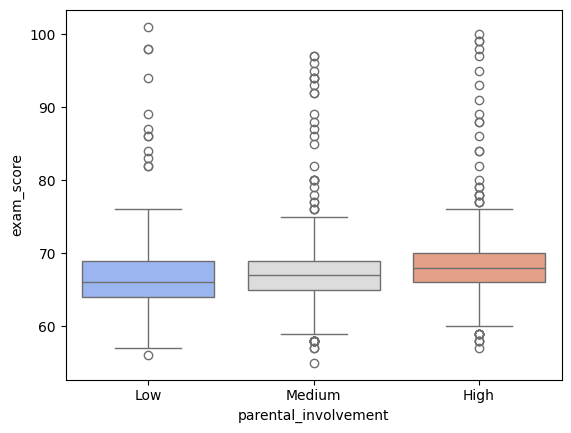

In [59]:
sns.boxplot(data=df, x="parental_involvement", y="exam_score", palette="coolwarm")
plt.show()

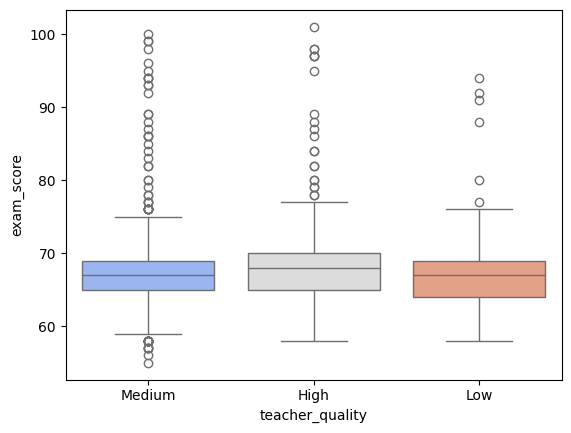

In [60]:
sns.boxplot(data=df, x="teacher_quality", y="exam_score", palette="coolwarm")
plt.show()

In [61]:
df.columns

Index(['hours_studied', 'attendance', 'parental_involvement',
       'access_to_resources', 'extracurricular_activities', 'sleep_hours',
       'previous_scores', 'motivation_level', 'internet_access',
       'tutoring_sessions', 'family_income', 'teacher_quality', 'school_type',
       'peer_influence', 'physical_activity', 'learning_disabilities',
       'parental_education_level', 'distance_from_home', 'gender',
       'exam_score'],
      dtype='object')

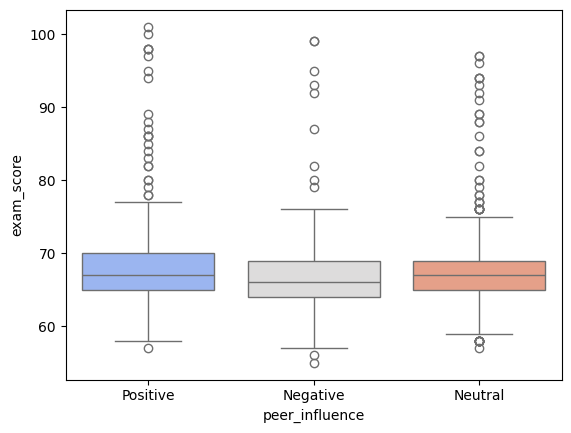

In [62]:
sns.boxplot(data=df, x="peer_influence", y="exam_score", palette="coolwarm")
plt.show()

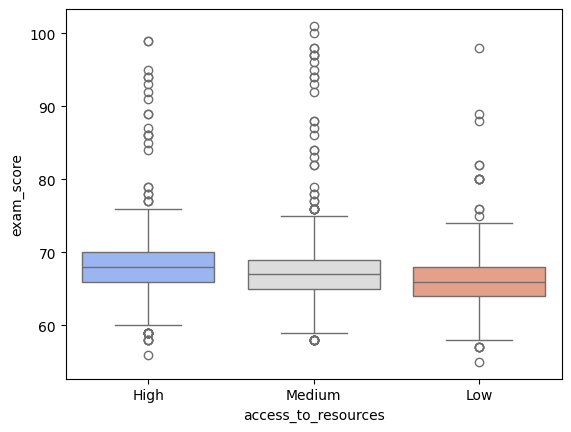

In [63]:
sns.boxplot(data=df, x="access_to_resources", y="exam_score", palette="coolwarm")
plt.show()

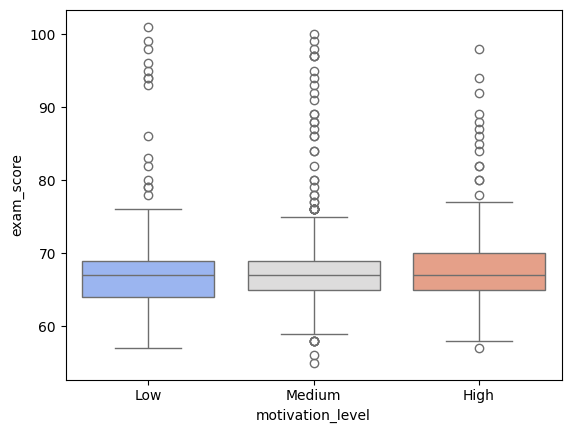

In [64]:
sns.boxplot(data=df, x="motivation_level", y="exam_score", palette="coolwarm")
plt.show()

So far I was trying to determine a factor which would influence the motivation level of the students and the only factor impacting that was the influence of peers.

The motivation level however doesn't seem to strongly impact the overall results of the exam scores as you can see from the boxplot above.
The exam score value is in fact well spread across low, medium and high motivation level.

What has most impacted the exam scores are the following variables:

- parental involvement
- teacher quality
- access to resources

This suggest that students whose parents are more present and who have access to better teachers and resources are destined to be in average more successful than their fellow students who might not be as lucky.

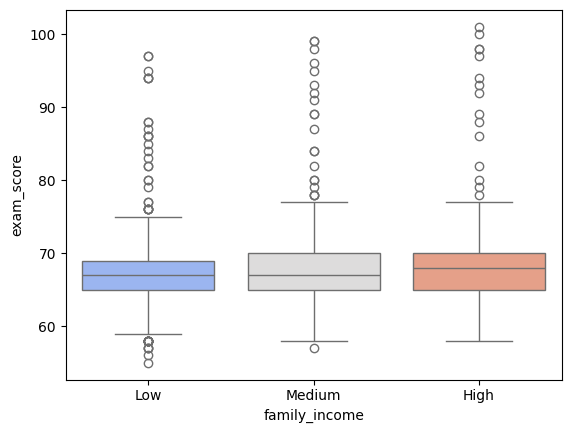

In [65]:
sns.boxplot(data=df, x="family_income", y="exam_score", palette="coolwarm")
plt.show()

In [66]:
mean_exam_score_parental = df.groupby('parental_involvement')['exam_score'].mean()

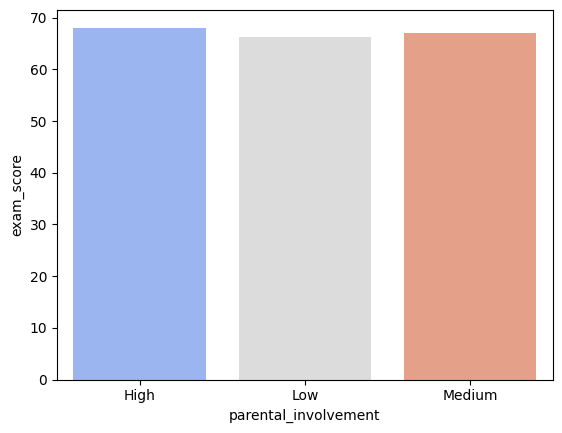

In [67]:
sns.barplot(data=mean_exam_score_parental.reset_index(), x="parental_involvement", y='exam_score', palette="coolwarm")
plt.show()

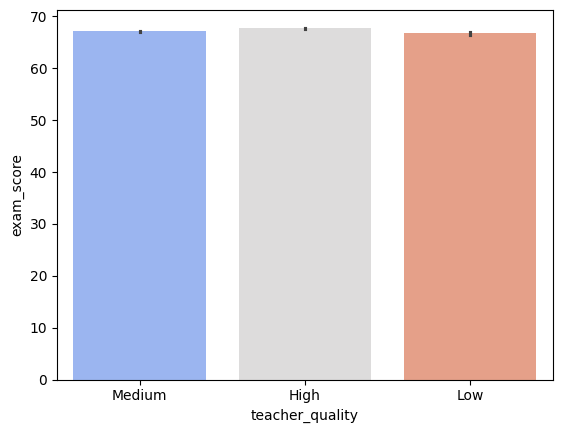

In [68]:
# Plotting a bar plot to visualize the average 'SalePrice' for each 'MSZoning' category, using the "coolwarm" color palette
sns.barplot(data=df, x="teacher_quality", y="exam_score", palette="coolwarm")
plt.show()

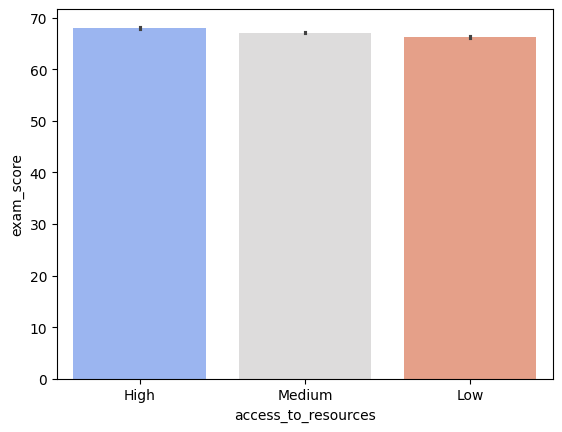

In [69]:
# Plotting a bar plot to visualize the average 'SalePrice' for each 'MSZoning' category, using the "coolwarm" color palette
sns.barplot(data=df, x="access_to_resources", y="exam_score", palette="coolwarm")
plt.show()

In [70]:
# Calculating the Pearson correlation coefficient between 'attendance' and 'exam_score' columns
float(df['attendance'].corr(df['exam_score'])) # PEARSON

0.5810718633120643

In [71]:
float(df['attendance'].corr(df['exam_score'], method="spearman")) # Spearman

0.6723661464413685

- **Pearson Correlation**: \(0.5810\)
- **Spearman Correlation**: \(0.6723\)

The Pearson and Spearman correlation tests also show that there's a dependency between the attendance rate and the exam score results.

In [72]:
num.corrwith(df['exam_score'], method='pearson').sort_values(ascending=False) # positive ones

exam_score           1.000000
attendance           0.581072
hours_studied        0.445455
previous_scores      0.175079
tutoring_sessions    0.156525
physical_activity    0.027824
sleep_hours         -0.017022
dtype: float64

In [73]:
num.corrwith(df['exam_score'], method='spearman').sort_values(ascending=False)

exam_score           1.000000
attendance           0.672366
hours_studied        0.480956
previous_scores      0.191941
tutoring_sessions    0.163940
physical_activity    0.029150
sleep_hours         -0.007629
dtype: float64

In [74]:
correlation_matrix = num.corr()

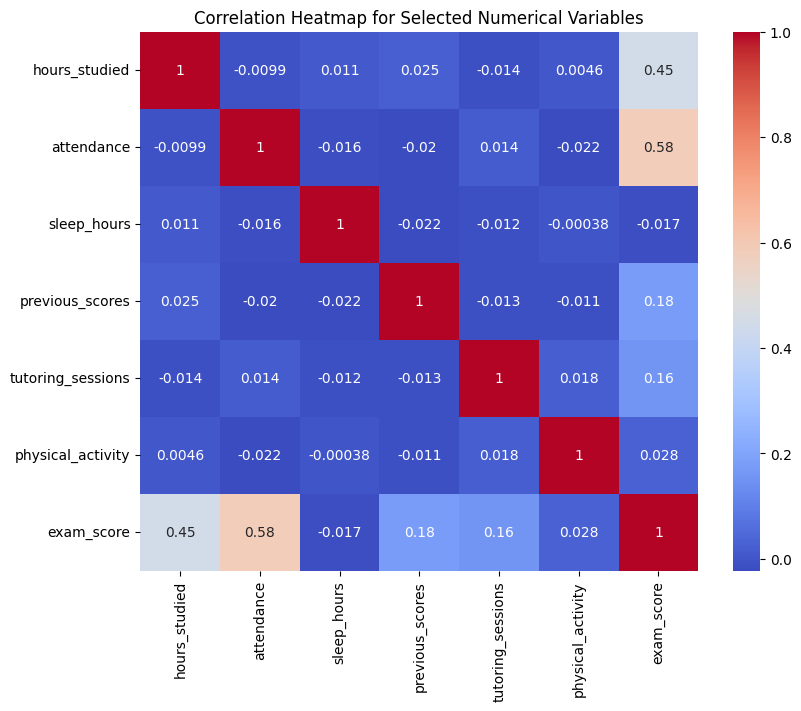

In [75]:
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(9, 7))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

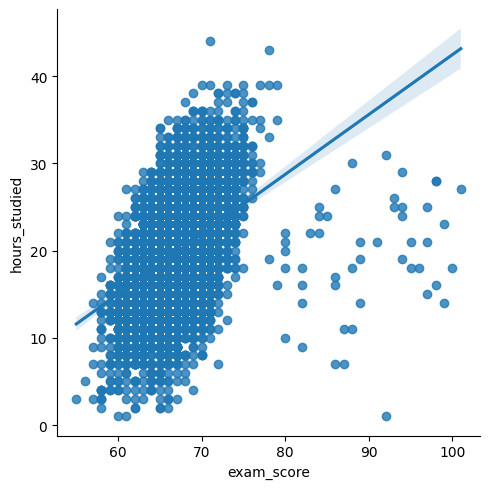

In [76]:
sns.lmplot(data=df,
            x='exam_score',
            y='hours_studied')
plt.show()

The heatmap and the scatter plot above strongly show a correlation between the hours invested into studying and the exam scores.

The next question for me is: do higher amount of hours invested relate to higher motivation or parental involvement?

To answer this question I'm going to try and analyze the outliers' situation.

These are students who are above average and their profile might shed some light on what makes a student successful beyond average.

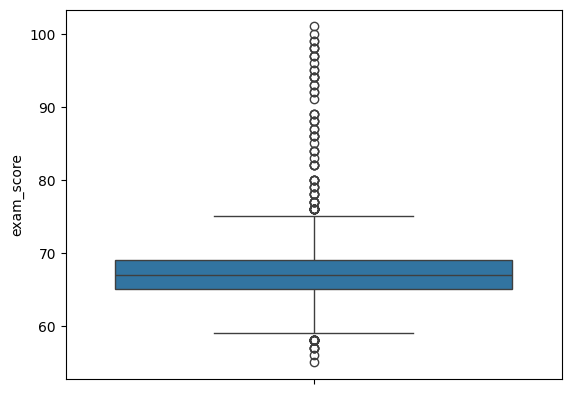

In [78]:
sns.boxplot(data=num.exam_score)
plt.show()

In [79]:
top_performers_df = df.copy()

In [80]:
top_performers_df = top_performers_df.loc[(top_performers_df['exam_score'] >= 75.0)]

In [81]:
top_performers_df = top_performers_df.sort_values(by='exam_score', ascending = False)

In [82]:
top_performers_df = top_performers_df.head(20)

Now that I have created a dataframe for the top performers I'm going to run the same investigations I ran at the beginning of this exercise.

In [84]:
top_performers_df.describe().T

,count,mean,std,min,25%,50%,75%,max
hours_studied,20.0,21.05,6.589266,1.0,18.00,22.0,25.25,29.0
attendance,20.0,86.25,9.925379,67.0,81.25,89.5,93.75,99.0
sleep_hours,20.0,6.30,1.490320,4.0,5.75,6.5,7.00,9.0
previous_scores,20.0,85.00,12.904508,54.0,76.75,90.0,93.25,98.0
tutoring_sessions,20.0,1.65,1.348488,0.0,1.00,1.5,2.00,5.0
physical_activity,20.0,2.80,1.005249,1.0,2.00,3.0,3.25,5.0
exam_score,20.0,96.20,2.566997,92.0,94.00,96.5,98.00,101.0


I will also create a df for all of the other students who are not top performers to be able to evaluate results based on top performers' result.

In [85]:
average_students_df = df.copy()

average_students_df = average_students_df.loc[(average_students_df['exam_score'] < 75.0)]

In [86]:
average_students_df.describe().T

,count,mean,std,min,25%,50%,75%,max
hours_studied,6483.0,19.855005,5.887086,1.0,16.0,20.0,24.0,44.0
attendance,6483.0,79.815209,11.494982,60.0,70.0,80.0,90.0,100.0
sleep_hours,6483.0,7.031930,1.468816,4.0,6.0,7.0,8.0,10.0
previous_scores,6483.0,75.009718,14.377231,50.0,63.0,75.0,87.0,100.0
tutoring_sessions,6483.0,1.484189,1.220463,0.0,1.0,1.0,2.0,8.0
physical_activity,6483.0,2.966374,1.028345,0.0,2.0,3.0,4.0,6.0
exam_score,6483.0,66.970847,3.238287,55.0,65.0,67.0,69.0,74.0


In [87]:
num_top_perf = top_performers_df.select_dtypes(include= 'number')
cat_top_perf = top_performers_df.select_dtypes(exclude= 'number')

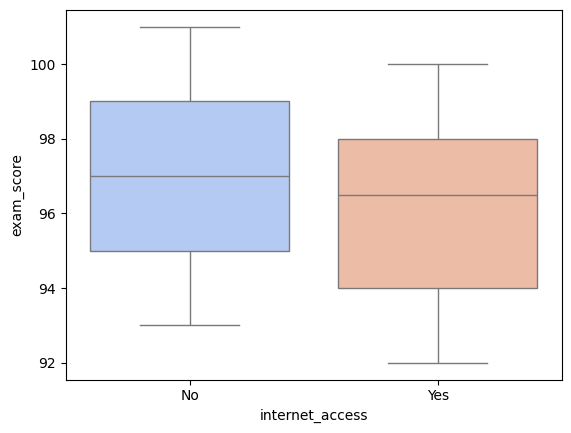

In [89]:
sns.boxplot(data=top_performers_df, x="internet_access", y="exam_score", palette="coolwarm")
plt.show()

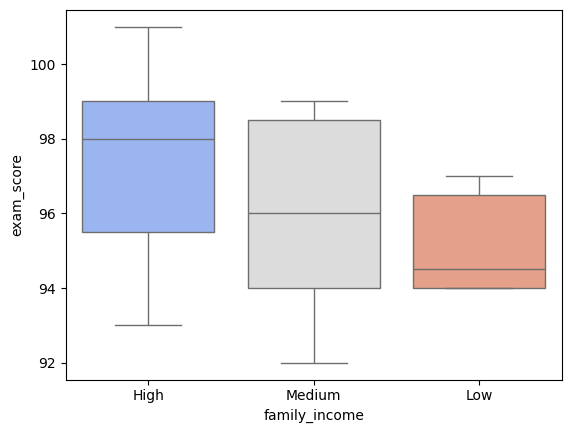

In [90]:
sns.boxplot(data=top_performers_df, x="family_income", y="exam_score", palette="coolwarm")
plt.show()

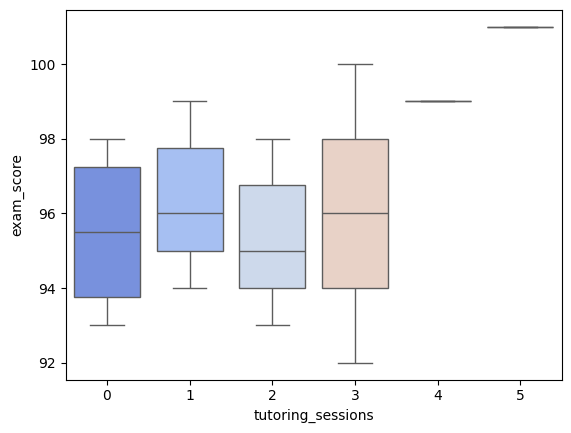

In [91]:
sns.boxplot(data=top_performers_df, x="tutoring_sessions", y="exam_score", palette="coolwarm")
plt.show()

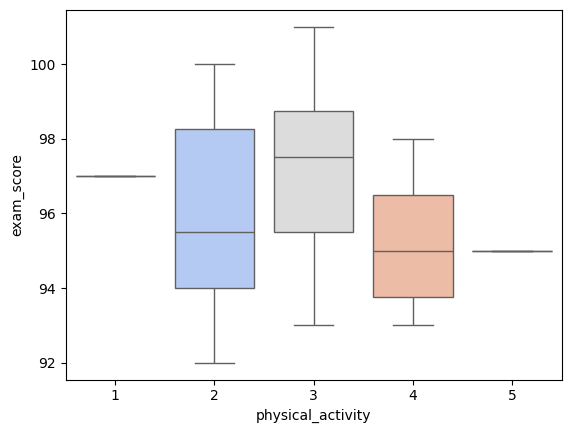

In [92]:
sns.boxplot(data=top_performers_df, x="physical_activity", y="exam_score", palette="coolwarm")
plt.show()

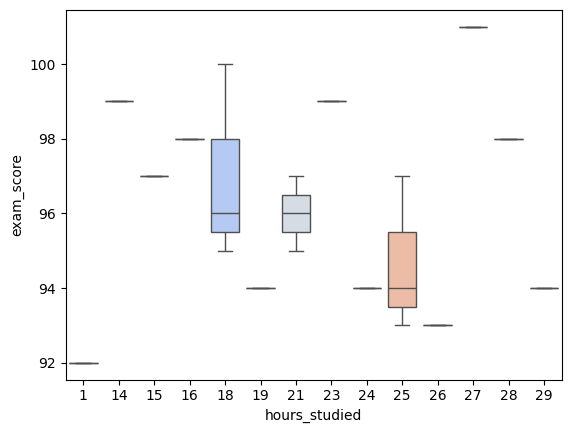

In [93]:
sns.boxplot(data=top_performers_df, x="hours_studied", y="exam_score", palette="coolwarm")
plt.show()

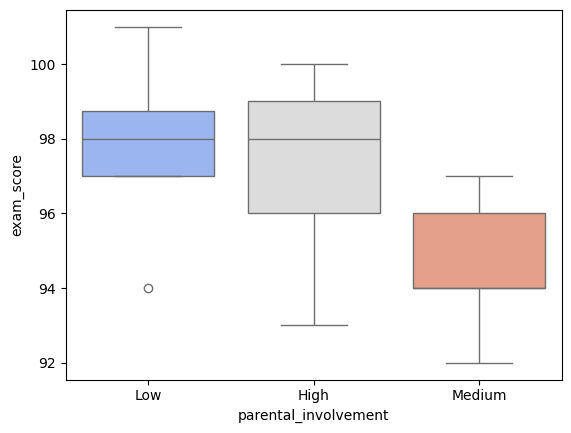

In [94]:
sns.boxplot(data=top_performers_df, x="parental_involvement", y="exam_score", palette="coolwarm")
plt.show()

Looking into these results it's clear that what makes the perfect recipe for top students to be successful is the following:

- investing more time in studying than average, plots show that even among the top performers the ones with highest average spent on books were the ones performing best,
- teacher quality is an ingredient which cannot miss, plots show that even among the top performers is important to have high quality teachers,
- parental involvement doesn't seem to be a variable impacting the success of top performers with the top performer having a low parental involvement
- family income seems to be an important factor, this might be explained by the fact the higher income families can provide better access to resources and higher amount of tutoring hours,
- amount of tutoring hours is an importan factor as the top of the class has in average higher amount of hours lessons,
- no internet access, among the best of the best we find the students who not only have spent more hours on books but also who had no internet access. This suggests that there might be a positive correlation between the extra time spent on books and not having distractions. 

I will now look into parental involvement and see if higher parental involvement leads to higher amount of hours spent on books which it has been already proven to be the most important factor in the success of the student.

For this analysis I will switch to the full df and not merely focusing on the top performers.

In [95]:
df['hours_studied'].mean()

np.float64(19.975329196306948)

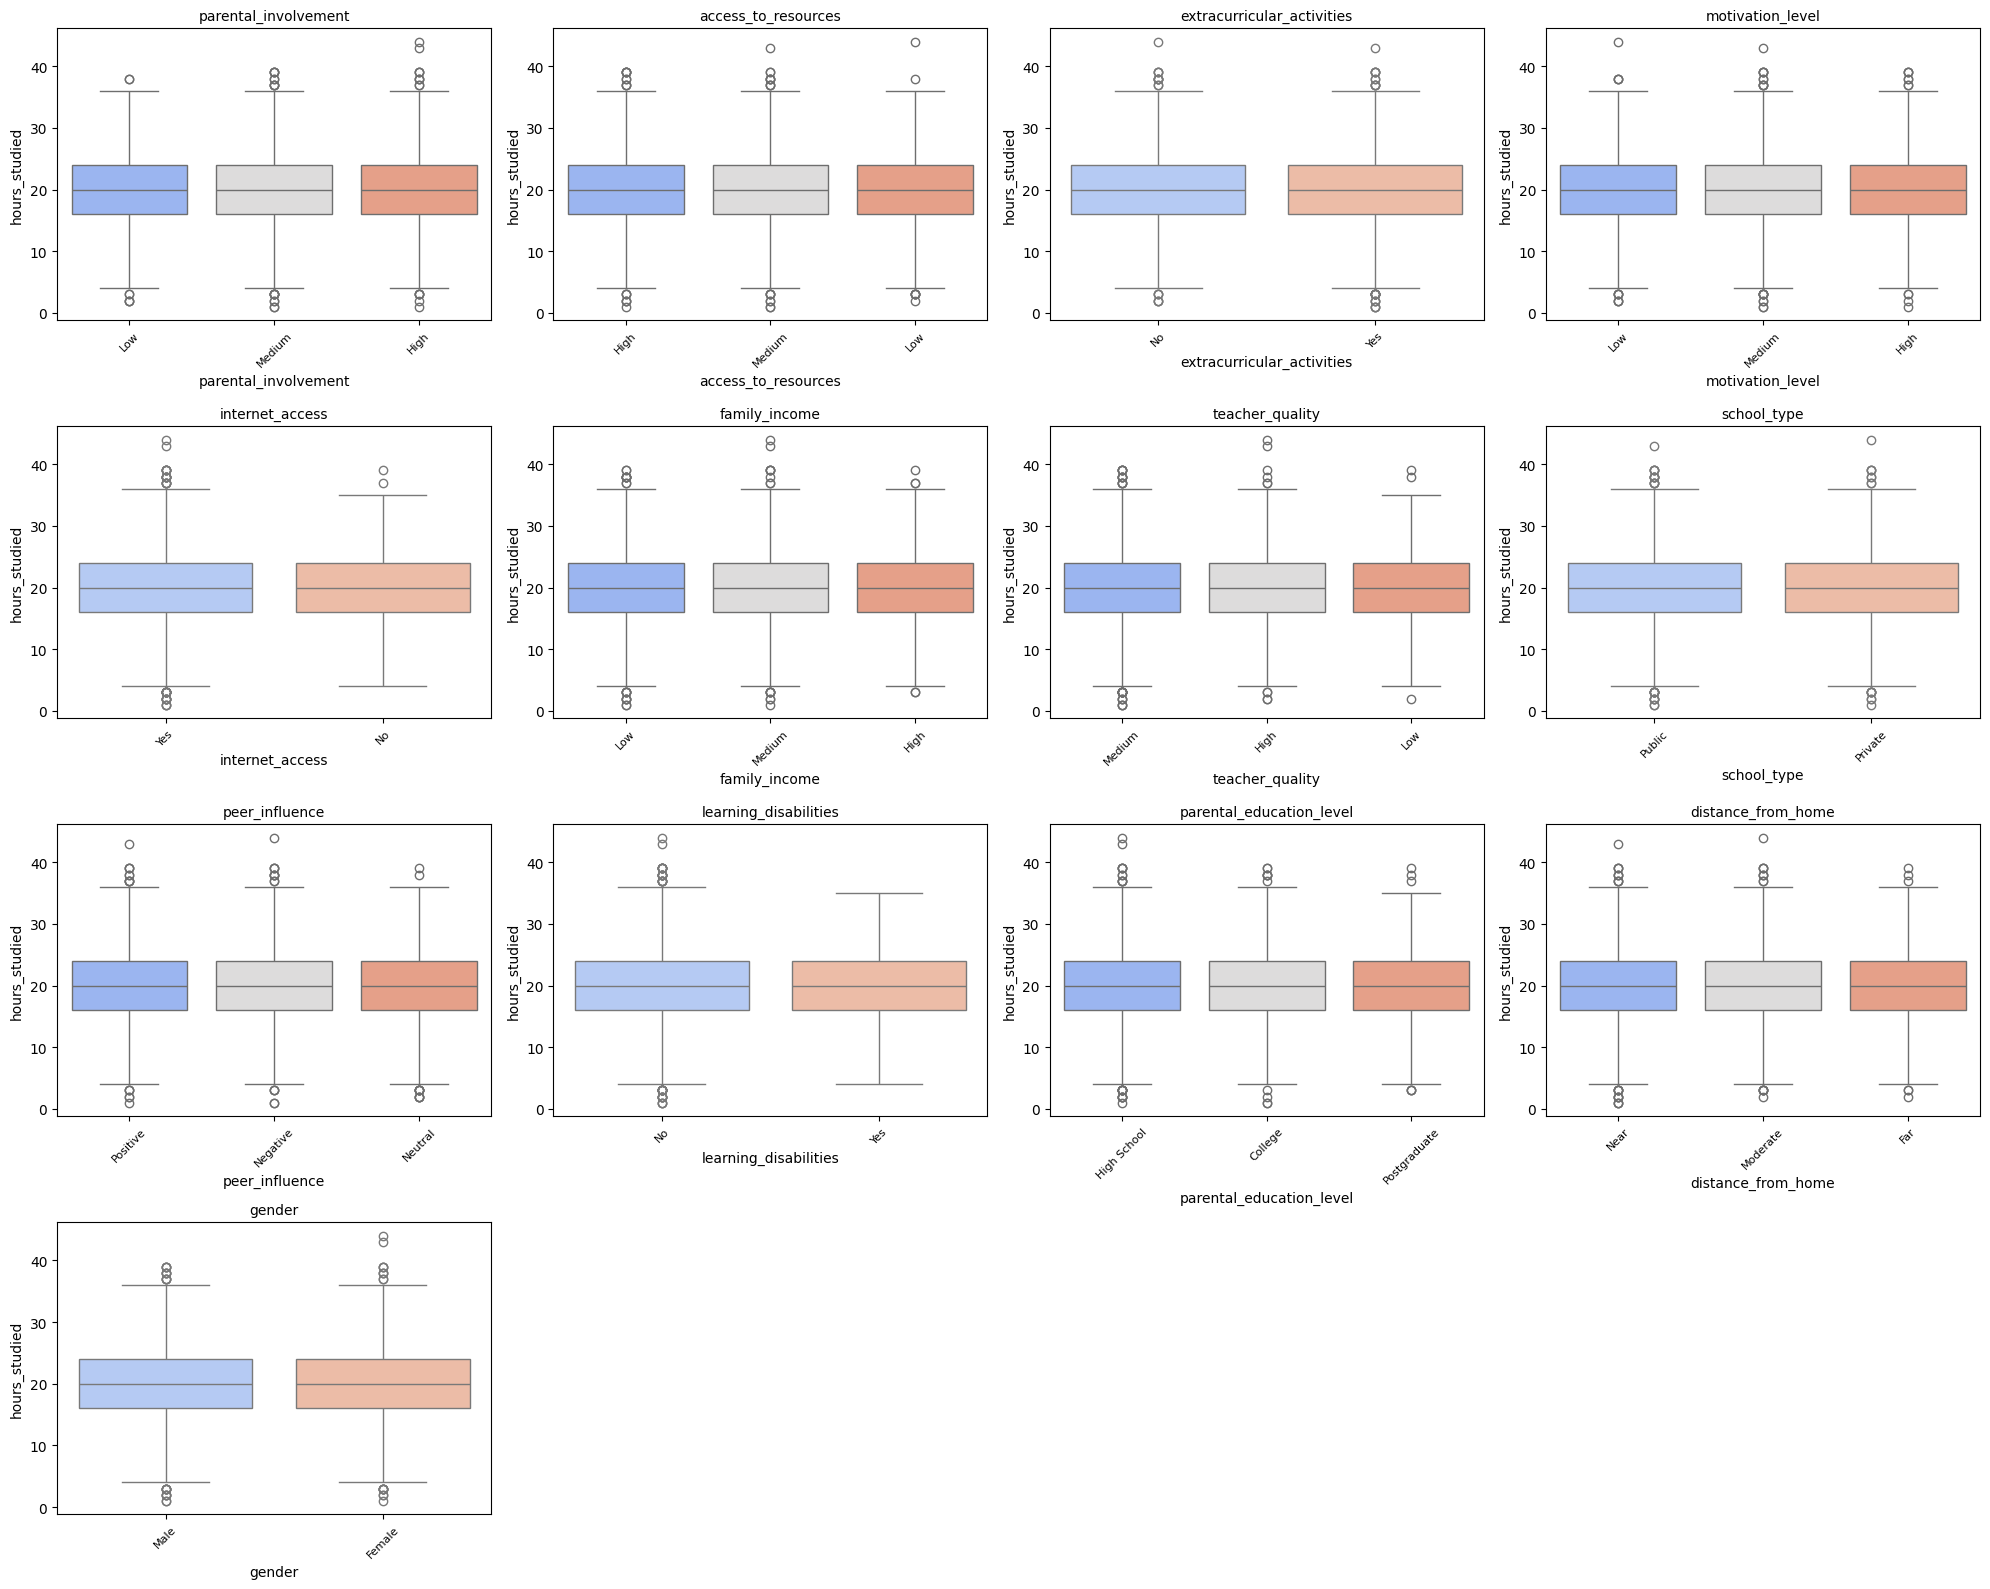

In [96]:
import warnings
warnings.filterwarnings("ignore")

color = '#0072B2'

# Define grid size
nrows, ncols = 4, 4  # Adjust based on the number of categorical columns
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Loop through categorical columns
for i, ax in enumerate(axes):
    if i >= len(cat.columns):  # If more subplots than columns, hide extras
        ax.set_visible(False)
        continue
    
    cat_column = cat.columns[i]  # Get categorical column name
    
    # Boxplot for 'hours_studied' grouped by categorical column
    sns.boxplot(data=df, x=cat_column, y="hours_studied", ax=ax, palette="coolwarm")
    
    ax.set_title(cat_column, fontsize=10)
    ax.tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.show()

Students who are in average more successful than others have higher attendance and hours studied rates.

This affirmation is however very limiting as one might ask: what does lead the student to have higher hours invested into studying and to attend as many classes as possible?

People might tend to think that is merely due to parental involvement but data tells us something different as you can see from the above.

Parental involvement and other categorical factors don't seem to be the factor which leads either to higher exam scores and higher attendance rate as the group of students whose parents were less involved also presented in average the highest attendance rates and this is the case for the vast majority of the students.

To find the answer I looked into the top performers and found out the factor which was leading the attendance right to be higher.

What really pushed the students to attend more eventually was the **teacher quality**.

Here below we can clearly see the huge difference between the attendance rates of those who had a high quality teacher and who had a low quality teacher.

So even if teacher quality isn't necessarily connected to have good notes, it's surely connected to high attendance rate which together with the hours invested into study leads to better notes.

And now if you are even more curious you might ask yourself: ok but how do I get my son or daughter a good quality teacher?

It might be easy to think that with higher family income or having access to private schooling your children are going to have access to higher teacher quality.

The data however shows us how good teachers can be found no matter families' social statuses and school.

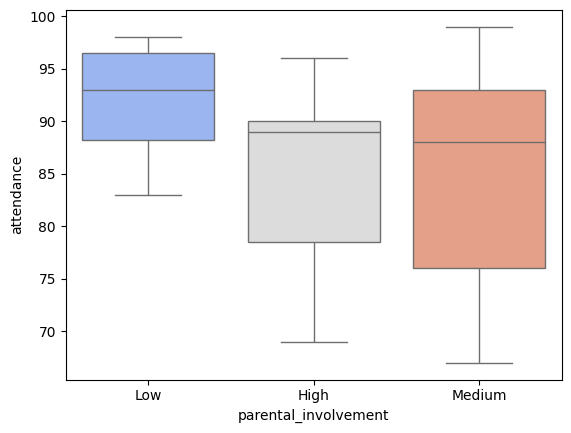

In [97]:
sns.boxplot(data=top_performers_df, x="parental_involvement", y="attendance", palette="coolwarm")
plt.show()

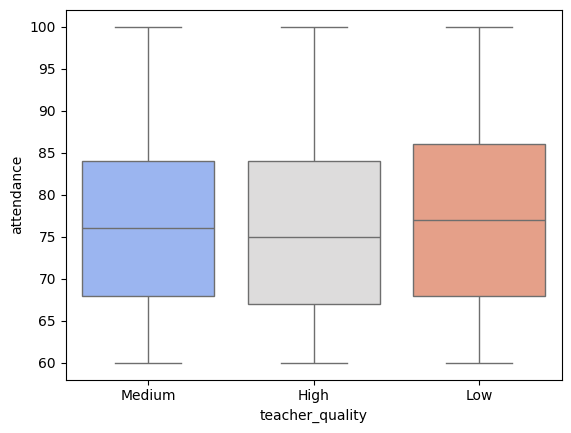

In [98]:
sns.boxplot(data=low_df, x="teacher_quality", y="attendance", palette="coolwarm")
plt.show()

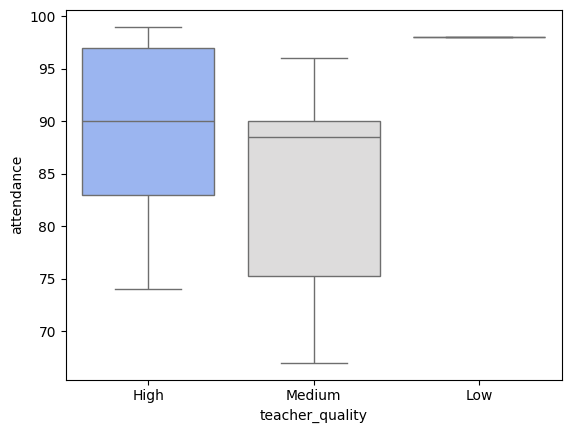

In [99]:
sns.boxplot(data=top_performers_df, x="teacher_quality", y="attendance", palette="coolwarm")
plt.show()

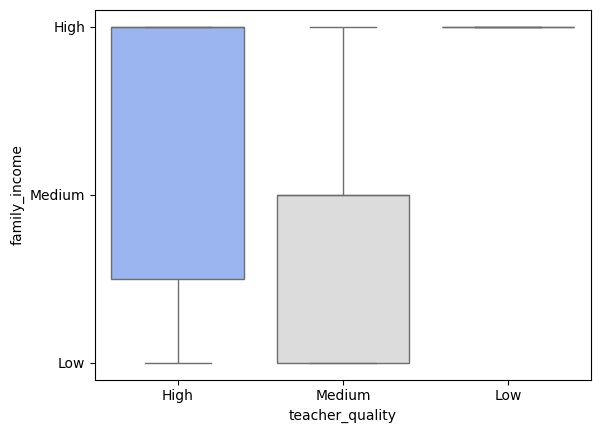

In [100]:
sns.boxplot(data=top_performers_df, x="teacher_quality", y="family_income", palette="coolwarm")
plt.show()

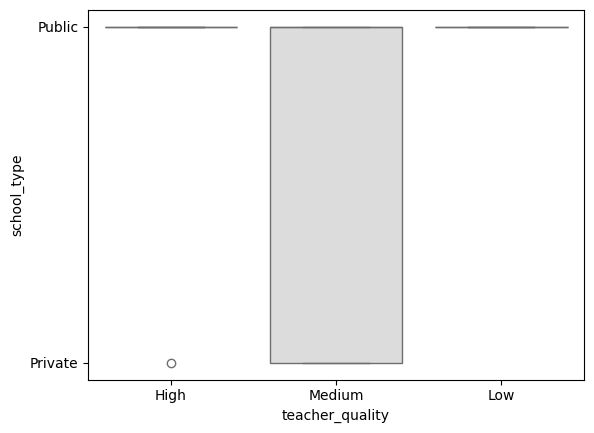

In [101]:
sns.boxplot(data=top_performers_df, x="teacher_quality", y="school_type", palette="coolwarm")
plt.show()

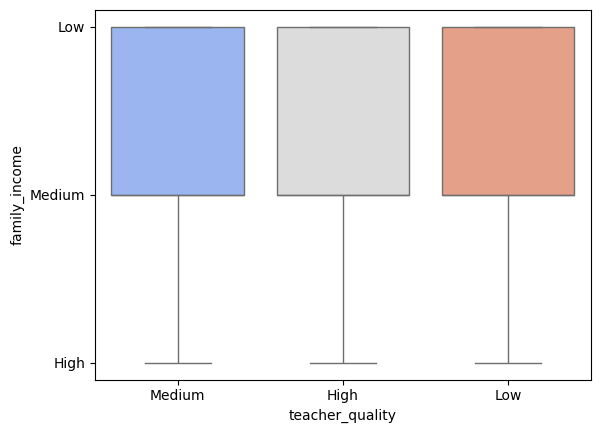

In [102]:
sns.boxplot(data=df, x="teacher_quality", y="family_income", palette="coolwarm")
plt.show()

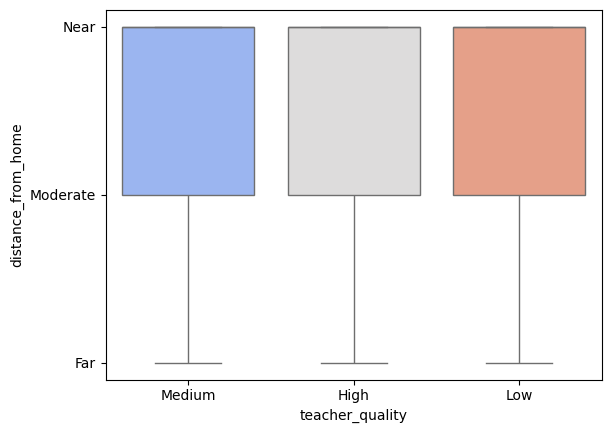

In [103]:
sns.boxplot(data=df, x="teacher_quality", y="distance_from_home", palette="coolwarm")
plt.show()

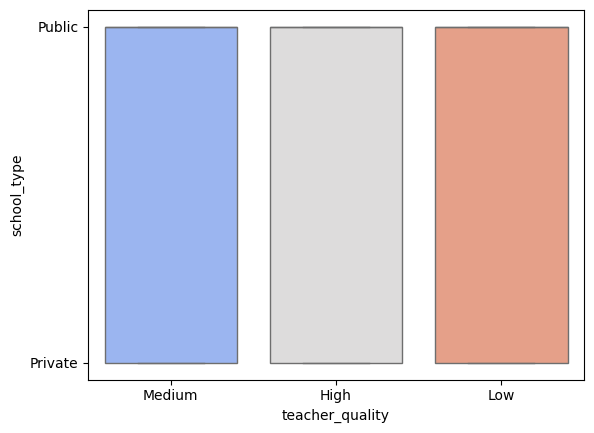

In [104]:
sns.boxplot(data=df, x="teacher_quality", y="school_type", palette="coolwarm")
plt.show()

In [105]:
df.reset_index(inplace=True)
df.rename(columns={'index': 'student_id'}, inplace=True)

In [106]:
#assigning a bin with numpy to the df
df['performance_category'] = np.where(df['exam_score'] < 70, 'Low', 'High')

In [107]:
low_attendance = df.copy()

In [108]:
low_attendance = low_attendance.loc[(low_attendance['attendance'] < 70.0)]

In [109]:
low_attendance.shape

(1573, 22)

In [110]:
low_attendance.describe().T

,count,mean,std,min,25%,50%,75%,max
student_id,1573.0,3347.556262,1895.059581,1.0,1699.0,3417.0,4990.0,6606.0
hours_studied,1573.0,19.972664,6.087562,1.0,16.0,20.0,24.0,44.0
attendance,1573.0,64.794024,2.769479,60.0,62.0,65.0,67.0,69.0
sleep_hours,1573.0,7.055308,1.467673,4.0,6.0,7.0,8.0,10.0
previous_scores,1573.0,75.600763,14.495004,50.0,63.0,76.0,88.0,100.0
tutoring_sessions,1573.0,1.446917,1.221837,0.0,1.0,1.0,2.0,7.0
physical_activity,1573.0,2.972664,1.024454,0.0,2.0,3.0,4.0,6.0
exam_score,1573.0,64.207883,3.177031,55.0,62.0,64.0,66.0,95.0


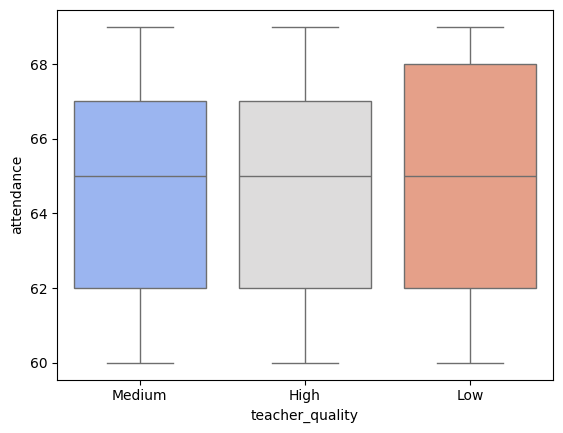

In [111]:
sns.boxplot(data=low_attendance, x="teacher_quality", y="attendance", palette="coolwarm")
plt.show()

In [112]:
top_performers_df['teacher_quality']

1525      High
94      Medium
2425    Medium
3579    Medium
6347      High
6393      High
4192    Medium
5966      High
919       High
529       High
3457    Medium
6522      High
4297    Medium
770     Medium
836     Medium
3124    Medium
4405       Low
4531    Medium
4583    Medium
4779    Medium
Name: teacher_quality, dtype: object

In [113]:
top_performers_df['teacher_quality'] = top_performers_df['teacher_quality'].str.strip()
top_performers_df = top_performers_df.loc[top_performers_df['teacher_quality'].isin(['High', 'Medium'])]

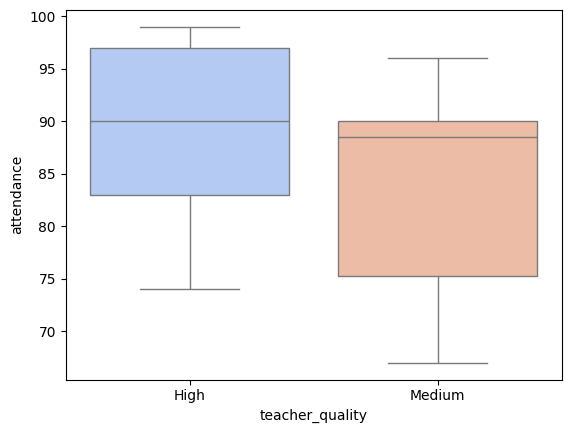

In [115]:
sns.boxplot(data=top_performers_df, x="teacher_quality", y="attendance", palette="coolwarm")
plt.show()

In [116]:
top_performers_df.groupby('teacher_quality')['attendance'].mean()

teacher_quality
High      89.000000
Medium    83.666667
Name: attendance, dtype: float64

As a further proof that quality of teaching was important to top performers here you can find the breakdown of average attendance rate between high and medium quality teaching:

High quality: 89%
Medium quality: 84%

In [117]:
teaching_result = pd.crosstab(top_performers_df['teacher_quality'],top_performers_df['attendance'])
teaching_result

attendance,67,69,73,74,76,83,88,89,90,93,96,98,99
teacher_quality,,,,,,,,,,,,,
High,0,0,0,1,0,2,0,0,1,0,1,1,1
Medium,1,1,1,0,1,1,1,1,3,1,1,0,0


In [118]:
# Chi-square test for 'MSZoning' and 'SaleCondition'
_, chi2_pvalue, _, _ = chi2_contingency(teaching_result)
chi2_pvalue

np.float64(0.5493403867005378)

In [119]:
df['attendance'].describe()

count    6607.000000
mean       79.977448
std        11.547475
min        60.000000
25%        70.000000
50%        80.000000
75%        90.000000
max       100.000000
Name: attendance, dtype: float64

In [120]:
df['attendance_level'] = pd.cut(df['attendance'], bins=[df['attendance'].min(), 70.0, 80.0,df['attendance'].max()], labels=['Low', 'Medium', 'High'], include_lowest= True)

In [137]:
attendance_level_crosstab = pd.crosstab(df['teacher_quality'], df['attendance_level'])
attendance_level_crosstab

attendance_level,Low,Medium,High
teacher_quality,,,
High,495,494,958
Low,181,154,322
Medium,1058,1041,1904


In [138]:
frequency_table_teacher = df['teacher_quality'].value_counts()

In [139]:
proportion_table_teacher = df['teacher_quality'].value_counts(normalize=True).round(2)

In [140]:
df7 = pd.concat([frequency_table_teacher, proportion_table_teacher], axis=1)
df7

,count,proportion
teacher_quality,,
Medium,4003,0.61
High,1947,0.29
Low,657,0.10


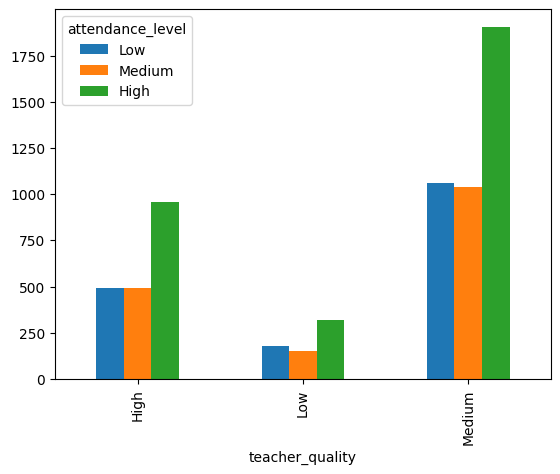

In [141]:
# no stacked
attendance_level_crosstab.plot(kind='bar')
plt.show()

In [142]:
# Chi-square test for 'teacher_quality' and 'attendance'
_, chi2_pvalue_teacher, _, _ = chi2_contingency(attendance_level_crosstab)
print(chi2_pvalue_teacher.round(2))

0.51


In [143]:
print(chi2_pvalue_teacher < 0.05)

False


In [130]:
attendance_level_crosstab = pd.crosstab(df['parental_involvement'], df['attendance_level'])
attendance_level_crosstab

attendance_level,Low,Medium,High
parental_involvement,,,
High,496,487,925
Low,336,340,661
Medium,902,862,1598


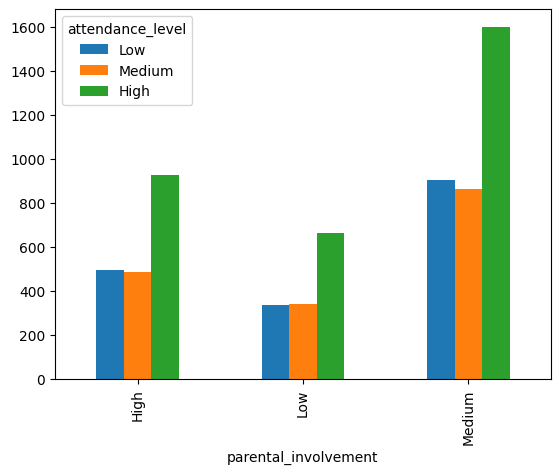

In [131]:
# no stacked
attendance_level_crosstab.plot(kind='bar')
plt.show()

In [136]:
# Chi-square test for 'parental_involvement' and 'attendance'
_, chi2_pvalue_parental, _, _ = chi2_contingency(attendance_level_crosstab)
print(chi2_pvalue_parental.round(2))

0.75


In [134]:
print(chi2_pvalue_parental < 0.05)

False


In [144]:
attendance_level_crosstab = pd.crosstab(df['peer_influence'], df['attendance_level'])
attendance_level_crosstab

attendance_level,Low,Medium,High
peer_influence,,,
Negative,355,371,651
Neutral,666,639,1287
Positive,713,679,1246


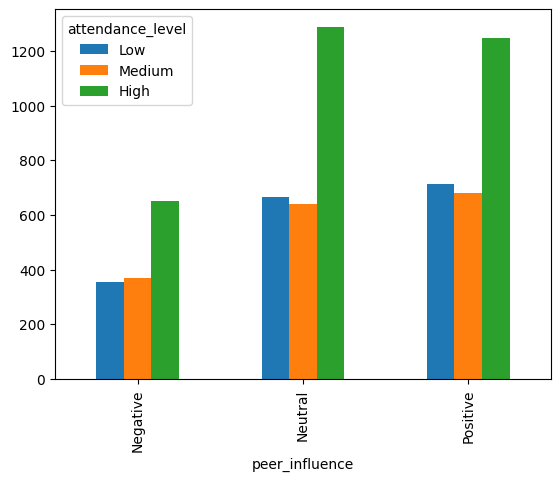

In [145]:
# no stacked
attendance_level_crosstab.plot(kind='bar')
plt.show()

In [146]:
# Chi-square test for 'parental_involvement' and 'attendance'
_, chi2_pvalue_peer, _, _ = chi2_contingency(attendance_level_crosstab)
print(chi2_pvalue_peer.round(2))

0.31


In [147]:
print(chi2_pvalue_parental < 0.05)

False


In [152]:
attendance_level_crosstab = pd.crosstab(df['parental_education_level'], df['attendance_level'])
attendance_level_crosstab

attendance_level,Low,Medium,High
parental_education_level,,,
College,508,543,938
High School,917,815,1581
Postgraduate,309,331,665


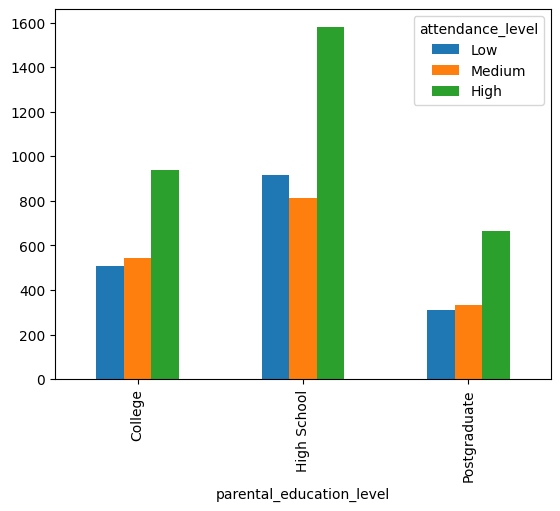

In [153]:
# no stacked
attendance_level_crosstab.plot(kind='bar')
plt.show()

In [165]:
# List of categorical columns
categorical_cols = [
    'parental_involvement', 'access_to_resources', 'extracurricular_activities',
    'motivation_level', 'internet_access', 'family_income', 'teacher_quality',
    'school_type', 'peer_influence', 'learning_disabilities',
    'parental_education_level', 'distance_from_home', 'gender'
]

# Dictionary to store results
chi2_results = {}
cramers_v_results = {}

for col in categorical_cols:
    # Create contingency table
    crosstab = pd.crosstab(df[col], df['attendance_level'])

    # Compute Chi-Square test
    chi2, p_value, dof, expected = chi2_contingency(crosstab)
    chi2_results[col] = p_value  # Store p-value

    # Compute Cramér’s V
    n = crosstab.sum().sum()  # Total sample size
    cramers_v = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))
    cramers_v_results[col] = cramers_v  # Store Cramér’s V value

# Convert results to DataFrame
chi2_cramers_df = pd.DataFrame({
    "Categorical Variable": categorical_cols,
    "Chi2 p-value": [chi2_results[col] for col in categorical_cols],
    "Cramér's V": [cramers_v_results[col] for col in categorical_cols]
})

display(name="Chi-Square & Cramér's V Results", dataframe=chi2_cramers_df)


In [166]:
print(chi2_cramers_df)

          Categorical Variable  Chi2 p-value  Cramér's V
0         parental_involvement      0.753826    0.011997
1          access_to_resources      0.131575    0.023152
2   extracurricular_activities      0.067502    0.028565
3             motivation_level      0.249666    0.020195
4              internet_access      0.584437    0.012751
5                family_income      0.205009    0.021171
6              teacher_quality      0.508342    0.015812
7                  school_type      0.696202    0.010470
8               peer_influence      0.306601    0.019093
9        learning_disabilities      0.295801    0.019202
10    parental_education_level      0.014108    0.030734
11          distance_from_home      0.525224    0.015557
12                      gender      0.628627    0.011854


The above is to prove that there's no strong evidence that any of the categorical values are going to impact the attendance rate.

Attendance rate must be affected by factors which are not taken into consideration in this dataset.

The suggestion to the dataset owner is to implement the following columns to improve visibility:

- **health_status** as this directly impacts the possibility of the student to attend classes,
- **family_environment** as depending from the living condition of the student attendance rate might be impacted.